# 04. 로지스틱 회귀 (Logistic Regression)
---
* 날짜:
* 이름:

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"]='sans'
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"]='sans'

## 개념정리

---
### **로지스틱 회귀**
---


<h1><center>$y = \sigma(wx + b)$</center></h1>

#### **시그모이드  구현**



<h1><center>$\sigma(x) = \frac{1}{1+e^{-x}}$</center></h1>

In [3]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

예제 
* $x_1 = (-1)$
* $x_2 = (0)$
* $x_3 = (1)$

In [4]:
print("-1 :",sigmoid(-1))
print("0 : ",sigmoid(0))
print("1 : ",sigmoid(1))


-1 : 0.2689414213699951
0 :  0.5
1 :  0.7310585786300049


* 시각화

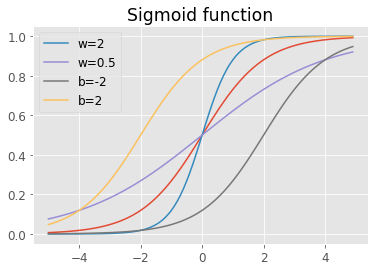

In [5]:
X=np.arange(-5, 5, 0.1)
Y=sigmoid(X)
X.shape,Y.shape
plt.title("Sigmoid function")
plt.plot(X,Y)
plt.plot(X,sigmoid(2*X), label='w=2')  #w=2
plt.plot(X,sigmoid(0.5*X), label='w=0.5')  #w=0.5
plt.plot(X,sigmoid(X-2), label='b=-2')  #b=-2
plt.plot(X,sigmoid(X+2), label='b=2')  #b=2
plt.legend()
plt.show()

#### **데이터 정의**


|라운드점수|결과|
|------|---|
|-3|패배|
|-2|패배|
|-1|패배|
|0|패배|
|1|승리|
|2|승리|
|3|승리

In [6]:
X=np.array([-3,-2,-1,0,1,2,3]).reshape(7,1)
Y=np.array([0,0,0,0,1,1,1]).reshape(7,1)
print(X.shape,Y.shape)

(7, 1) (7, 1)


#### **모델 구현**

In [7]:
def model(X):
  #(7,1)->(7,1)w 되어야한다
  W = np.random.randn(1).reshape(1,1) # W (1,1)
  b = np.random.randn(1)              # b (1)
  return sigmoid(np.matmul(X,W)+b)

#### **예측**

In [8]:
Y_pred = model(X)
print(Y_pred,Y_pred.shape)

[[0.01592601]
 [0.04082076]
 [0.10064965]
 [0.22737962]
 [0.4362718 ]
 [0.67052341]
 [0.84256172]] (7, 1)


* 시각화

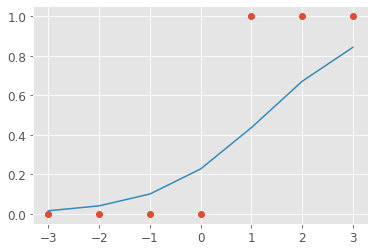

In [9]:
from matplotlib import markers
plt.plot(X,Y, linestyle='',marker = 'o')  #실제 데이터
plt.plot(X,Y_pred)                       #예측한 데이터
plt.show()

---
### **비용함수 (Cost function)**
---


####**바이너리 크로스 엔트로피 ( Binary Cross Entropy)**

<h3><center>$Binary Cross Entropy = -ylog(\hat{y})-(1-y)log(1-\hat{y}) $</center></h3>




* 구현



In [10]:
def BCE(y,y_hat):
  #y=0
  if y==0:
    return -np.log(1-y_hat)
  #y=1
  elif y==1:
    return -np.log(y_hat)
  else:
    print("y value error!")

In [11]:
for y,y_pred in zip(Y,Y_pred):
  bce = BCE(y,y_pred)
  print(bce)

[0.0160542]
[0.04167732]
[0.10608261]
[0.25796745]
[0.82948983]
[0.39969666]
[0.17130836]


* 시각화

[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]


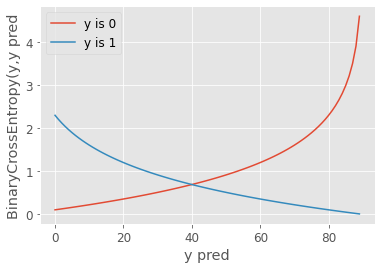

In [12]:
y_pred =np.arange(0.1,1,0.01)
print(y_pred)
bce_y_is0 =BCE(0,y_pred)
bce_y_is1 =BCE(1,y_pred)
plt.plot(bce_y_is0, label = 'y is 0')
plt.plot(bce_y_is1, label = 'y is 1')
plt.xlabel("y pred")
plt.ylabel("BinaryCrossEntropy(y,y pred")
plt.legend()
plt.show()

---
### **sklearn 을 이용한 모델구현**
---

* `LogisticRegression`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression





#### **모델학습**

* 모델 불러오기

In [13]:
from sklearn import linear_model

model = linear_model.LogisticRegression()

* 학습

In [14]:
model.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

* 예측

In [15]:
Y_pred = model.predict(X)
print(Y_pred,Y_pred.shape)

[0 0 0 0 1 1 1] (7,)


* 시각화

No handles with labels found to put in legend.


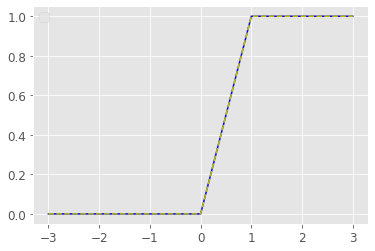

In [16]:
plt.plot(X,Y ,c='b')
plt.plot(X, Y_pred,c='y', linestyle = '--')
plt.legend()
plt.show()

#### **성능평가**

* 혼돈행렬(Confusion matrix)
  * `sklean.metrics.confusion_matrix`

[[4 0]
 [0 3]]


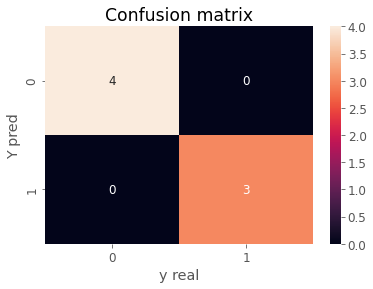

In [17]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(Y,Y_pred)
print(m)
import seaborn as sns
sns.heatmap(m,annot=True)
plt.title("Confusion matrix")
plt.xlabel("y real")
plt.ylabel("Y pred")
plt.show()

* 정확도 (Accuracy)
  * `model.score`

In [18]:
acc = model.score(X,Y)
acc

1.0

* AUC(Area under the curve)
  * `metrics.roc_curve`
  * `metrics.auc`

In [19]:
from sklearn import metrics
fpr, tpr, thres = metrics.roc_curve(Y,Y_pred)
print(fpr,tpr , thres)

[0. 0. 1.] [0. 1. 1.] [2 1 0]


In [40]:
auc = metrics.auc(fpr,tpr)
print(auc)

0.9009740259740261



## **과제**

---
### **과제01**
---

공부시간, 집중도, 수면시간을 이용해서 합격 여부를 추측하세요. `sklearn` 라이브러리의 `LogisticRegression`를 시용합니다. 


|공부시간|집중도|수면시간|종합성적|
|------|---|---|---|
|0|1|9|불합격|
|1|1|8.5|불합격|
|2|2|8|불합격|
|3|4|8|불합격|
|4|3|7|불합격|
|5|5|7.5|합격|
|6|6|7|합격|
|7|6|6|합격|
|8|7|7|합격|
|9|6|6.5|합격|

* 데이터 정의

In [21]:
X=np.array([[0,1,2,3,4,5,6,7,8,9],[1,1,2,4,3,5,6,6,7,6],[9,8.5,8,8,7,7.5,7,6,7,6.5]]).swapaxes(0,1)
Y=np.array([0,0,0,0,0,1,1,1,1,1]).reshape(10,1)
print(X.shape,Y.shape)
print(X,Y)

(10, 3) (10, 1)
[[0.  1.  9. ]
 [1.  1.  8.5]
 [2.  2.  8. ]
 [3.  4.  8. ]
 [4.  3.  7. ]
 [5.  5.  7.5]
 [6.  6.  7. ]
 [7.  6.  6. ]
 [8.  7.  7. ]
 [9.  6.  6.5]] [[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


#### **모델학습**

* 모델 불러오기

In [22]:
from sklearn import linear_model

model = linear_model.LogisticRegression()


* 학습

In [23]:
model.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

* 예측

In [24]:
Y_pred = model.predict(X)
print(Y_pred,Y_pred.shape)

[0 0 0 0 0 1 1 1 1 1] (10,)


* 시각화

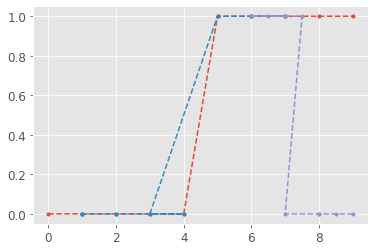

In [25]:
plt.plot
plt.plot(X,Y_pred,marker='.', linestyle = '--')
plt.show()

#### **성능평가**

* 혼돈행렬(Confusion matrix)
  * `sklean.metrics.confusion_matrix`

[[5 0]
 [0 5]]


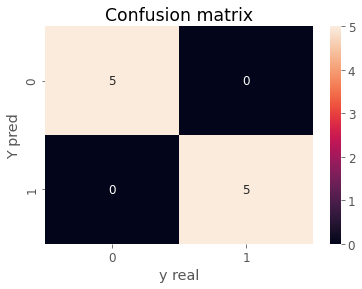

In [26]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(Y,Y_pred)
print(m)
import seaborn as sns
sns.heatmap(m,annot=True)
plt.title("Confusion matrix")
plt.xlabel("y real")
plt.ylabel("Y pred")
plt.show()

* 정확도 (Accuracy)
  * `model.score`

In [27]:
from sklearn import metrics
fpr, tpr, thres = metrics.roc_curve(Y,Y_pred)
print(fpr,tpr , thres)

[0. 0. 1.] [0. 1. 1.] [2 1 0]


* AUC(Area under the curve)
  * `metrics.roc_curve`
  * `metrics.auc`

In [28]:
from sklearn import metrics
fpr, tpr, thres = metrics.roc_curve(Y,Y_pred)
auc  = metrics.auc(Y,Y_pred)
print(fpr,tpr,thres)
print(auc)

[0. 0. 1.] [0. 1. 1.] [2 1 0]
0.5


---
### **과제02**
---

`Pandas` 데이터셋의  `penguins`를 사용합니다. 펭귄의 성별을 예측해 보세요 

In [29]:
import seaborn as sns
import pandas
df_pre = sns.load_dataset("penguins")
df_pre.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [30]:
def preprocess_penguins(df_pre):

  #범주형 수치화(성별,섬,종)
  mask_m = df_pre["sex"] =='Male'
  mask_f = df_pre["sex"] =='Female'
  df_pre.loc[mask_m, "sex"] =0
  df_pre.loc[mask_f, "sex"] =1

  mask_i_t = df_pre["island"] =='Torgersen'
  mask_i_b = df_pre["island"] =='Biscoe'
  mask_i_d = df_pre["island"] =='Dream'
  df_pre.loc[mask_i_t, "island"] =0
  df_pre.loc[mask_i_b, "island"] =1
  df_pre.loc[mask_i_d, "island"] =2

  mask_s_a = df_pre["species"] =='Adelie' 
  mask_s_c = df_pre["species"] =='Chinstrap'
  mask_s_g = df_pre["species"] =='Gentoo'
  df_pre.loc[mask_s_a, "species"] =0
  df_pre.loc[mask_s_c, "species"] =1
  df_pre.loc[mask_s_g, "species"] =2
  
  #min-max정규화
  for col in ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']:
    df_pre[col] = (df_pre[col]-df_pre[col].min())/(df_pre[col].max()-df_pre[col].min())
  #(object->int)
  
  #결측값 줄삭제
  df_pre = df_pre.dropna(axis=0)
  return df_pre

In [31]:
train=preprocess_penguins(df_pre)
train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,0.254545,0.666667,0.152542,0.291667,0
1,0,0,0.269091,0.511905,0.237288,0.305556,1
2,0,0,0.298182,0.583333,0.389831,0.152778,1
4,0,0,0.167273,0.738095,0.355932,0.208333,1
5,0,0,0.261818,0.892857,0.305085,0.263889,0


In [32]:
df=train.to_numpy()
X = df[:, 0:-1]
Y = df[:, -1]
print(X.shape,Y.shape)

(333, 6) (333,)


In [33]:
Y = np.array(Y, dtype='int')
X[:2] = np.array(X[0:2],dtype='int')

In [34]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X, Y)


LogisticRegression()

In [35]:
Y_pred = model.predict(X)
print(Y_pred,Y_pred.shape)

[1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0] (333,)


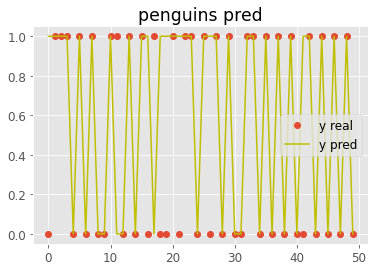

In [36]:
plt.plot(Y[:50] ,marker='o',linestyle='',label='y real')
plt.plot( Y_pred[:50],c='y',label="y pred")
plt.title("penguins pred")
plt.legend()
plt.show()

[[150  18]
 [ 15 150]]


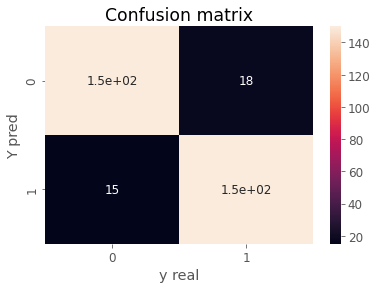

In [37]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(Y,Y_pred)
print(m)
import seaborn as sns
sns.heatmap(m,annot=True)
plt.title("Confusion matrix")
plt.xlabel("y real")
plt.ylabel("Y pred")
plt.show()

In [38]:
from sklearn import metrics
fpr, tpr, thres = metrics.roc_curve(Y,Y_pred)
print(fpr,tpr , thres)

[0.         0.10714286 1.        ] [0.         0.90909091 1.        ] [2 1 0]


In [39]:
auc = metrics.auc(fpr,tpr)
print(auc)

0.9009740259740261
